# Sentence traces

In [1]:
import numpy
from sklearn.decomposition import PCA
import imaginet.data_provider as dp
import pylab
import imaginet.trajectories
import imaginet.driver
%pylab inline

Couldn't import dot_parser, loading of dot files will not be possible.
Populating the interactive namespace from numpy and matplotlib

Using gpu device 0: Tesla K20m

pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy


## Load data

In [2]:
prov = dp.getDataProvider('coco', root='/home/gchrupala/repos/reimaginet')
sent_val = [s['raw'].split() for s in prov.iterSentences(split='val') ]

## Import a model

In [3]:
modeldir = "/home/gchrupala/repos/reimaginet/run-104-extratrain/"
M = imaginet.driver.load(modeldir, model_name='model.5.pkl.gz')

/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg/theano/tensor/subtensor.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  start in [None, 0] or
/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg/theano/tensor/subtensor.py:114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  stop in [None, length, maxsize] or
/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg/theano/tensor/opt.py:2165: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (replace_x == replace_y and
/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg/theano/scan_module/scan_perform_ext.py:85: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


In [4]:
tracer = imaginet.trajectories.Tracer(M) 

## Fit tracer on validation data

In [5]:
tracer.fit(sent_val)

Embedding
Fitting PCA


## Inspect proportion of explained variance

In [8]:
tracer.proj.explained_variance_ratio_

array([ 0.05399805,  0.04475705], dtype=float32)

## Example sentences

In [6]:
sents = [ s.split() for s in ['two giraffes in a grassy area', 'some zebras running around',
                              'a woman playing badmington', 'a girl plays frisbee', 
                              'a slice of pizza', 'a bowl of salad',
                              ] ]

## Plot sentence traces

(-1.5, 2.0, -1.5, 1.5)

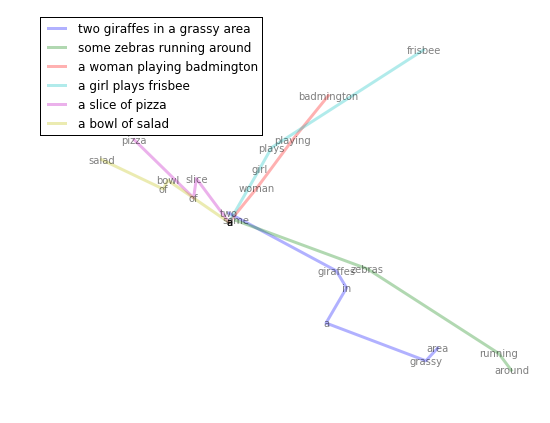

In [7]:
tracer.traces(sents, size=(9,7))
axis('off')


## Plot traces of a random sample of sentences

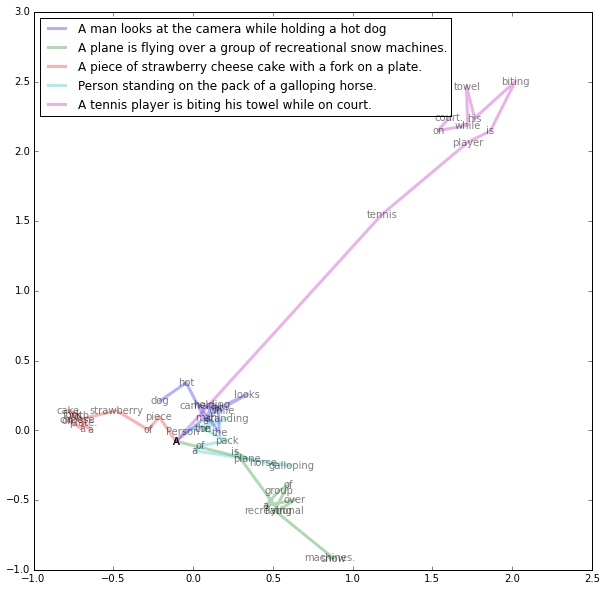

In [10]:
sample = numpy.random.choice(sent_val,5) 
tracer.traces(sample, size=(10,10))